<a href="https://colab.research.google.com/github/shubham6760/Protective_equipment_detection/blob/main/live_Protective_equipment_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install ultralyticsplus==0.0.24 ultralytics==8.0.23


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
model = YOLO('keremberke/yolov8m-protective-equipment-detection')

In [21]:
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

In [22]:
image = '/content/cw1.jpg'

In [23]:
results = model.predict(image)

Ultralytics YOLOv8.0.23 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs
image 1/1 /content/cw1.jpg: 480x640 1 no_goggles, 1522.7ms
Speed: 1.2ms pre-process, 1522.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


tensor([[1.02600e+03, 1.01000e+02, 1.10600e+03, 1.39000e+02, 3.77829e-01, 5.00000e+00]])


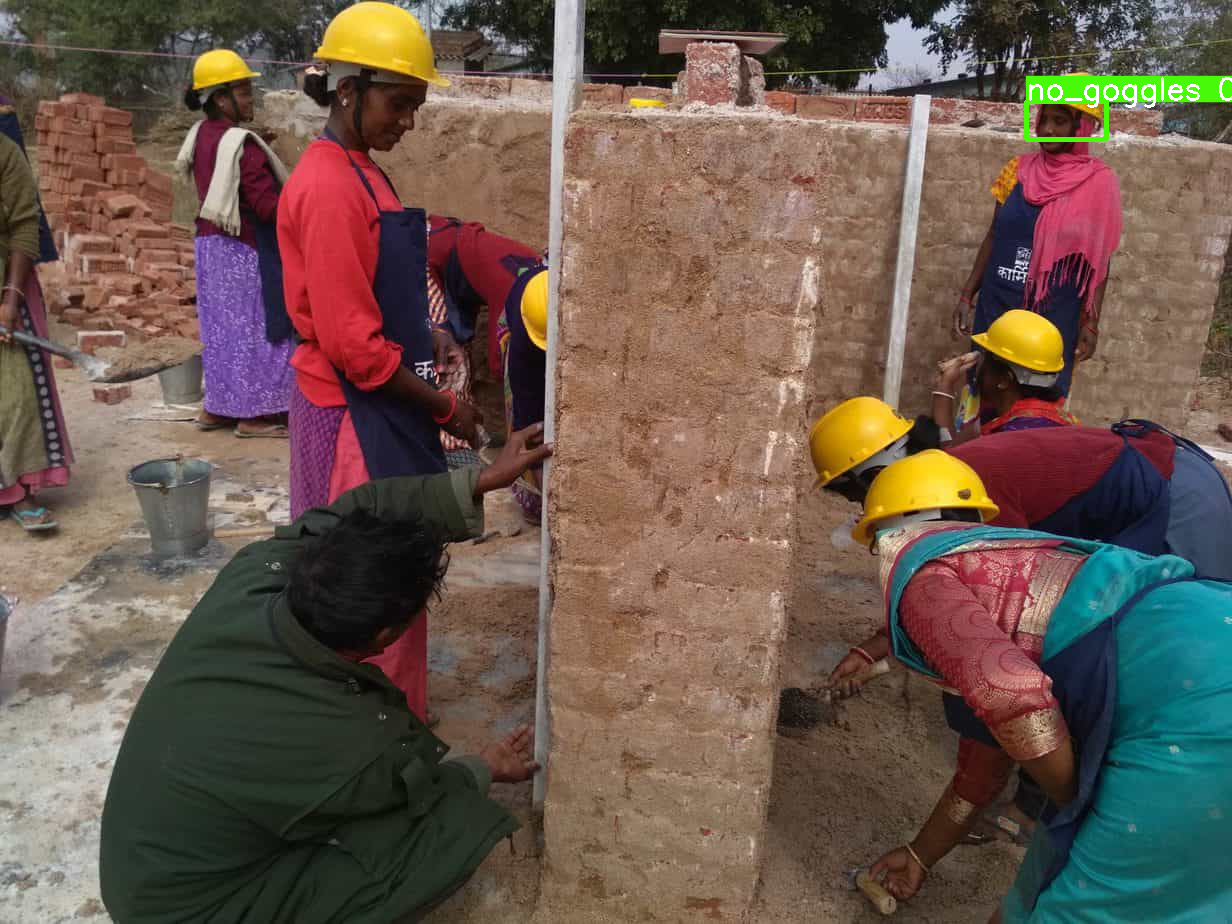

In [24]:
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()

In [29]:
image = '/content/cw3.jpg'

In [30]:
results = model.predict(image)

image 1/1 /content/cw3.jpg: 448x640 1 no_glove, 1 no_goggles, 988.1ms
Speed: 1.3ms pre-process, 988.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


tensor([[1.08900e+03, 2.88000e+02, 1.31100e+03, 7.84000e+02, 3.26246e-01, 4.00000e+00],
        [2.15900e+03, 1.42500e+03, 2.38400e+03, 1.52100e+03, 2.67984e-01, 5.00000e+00]])


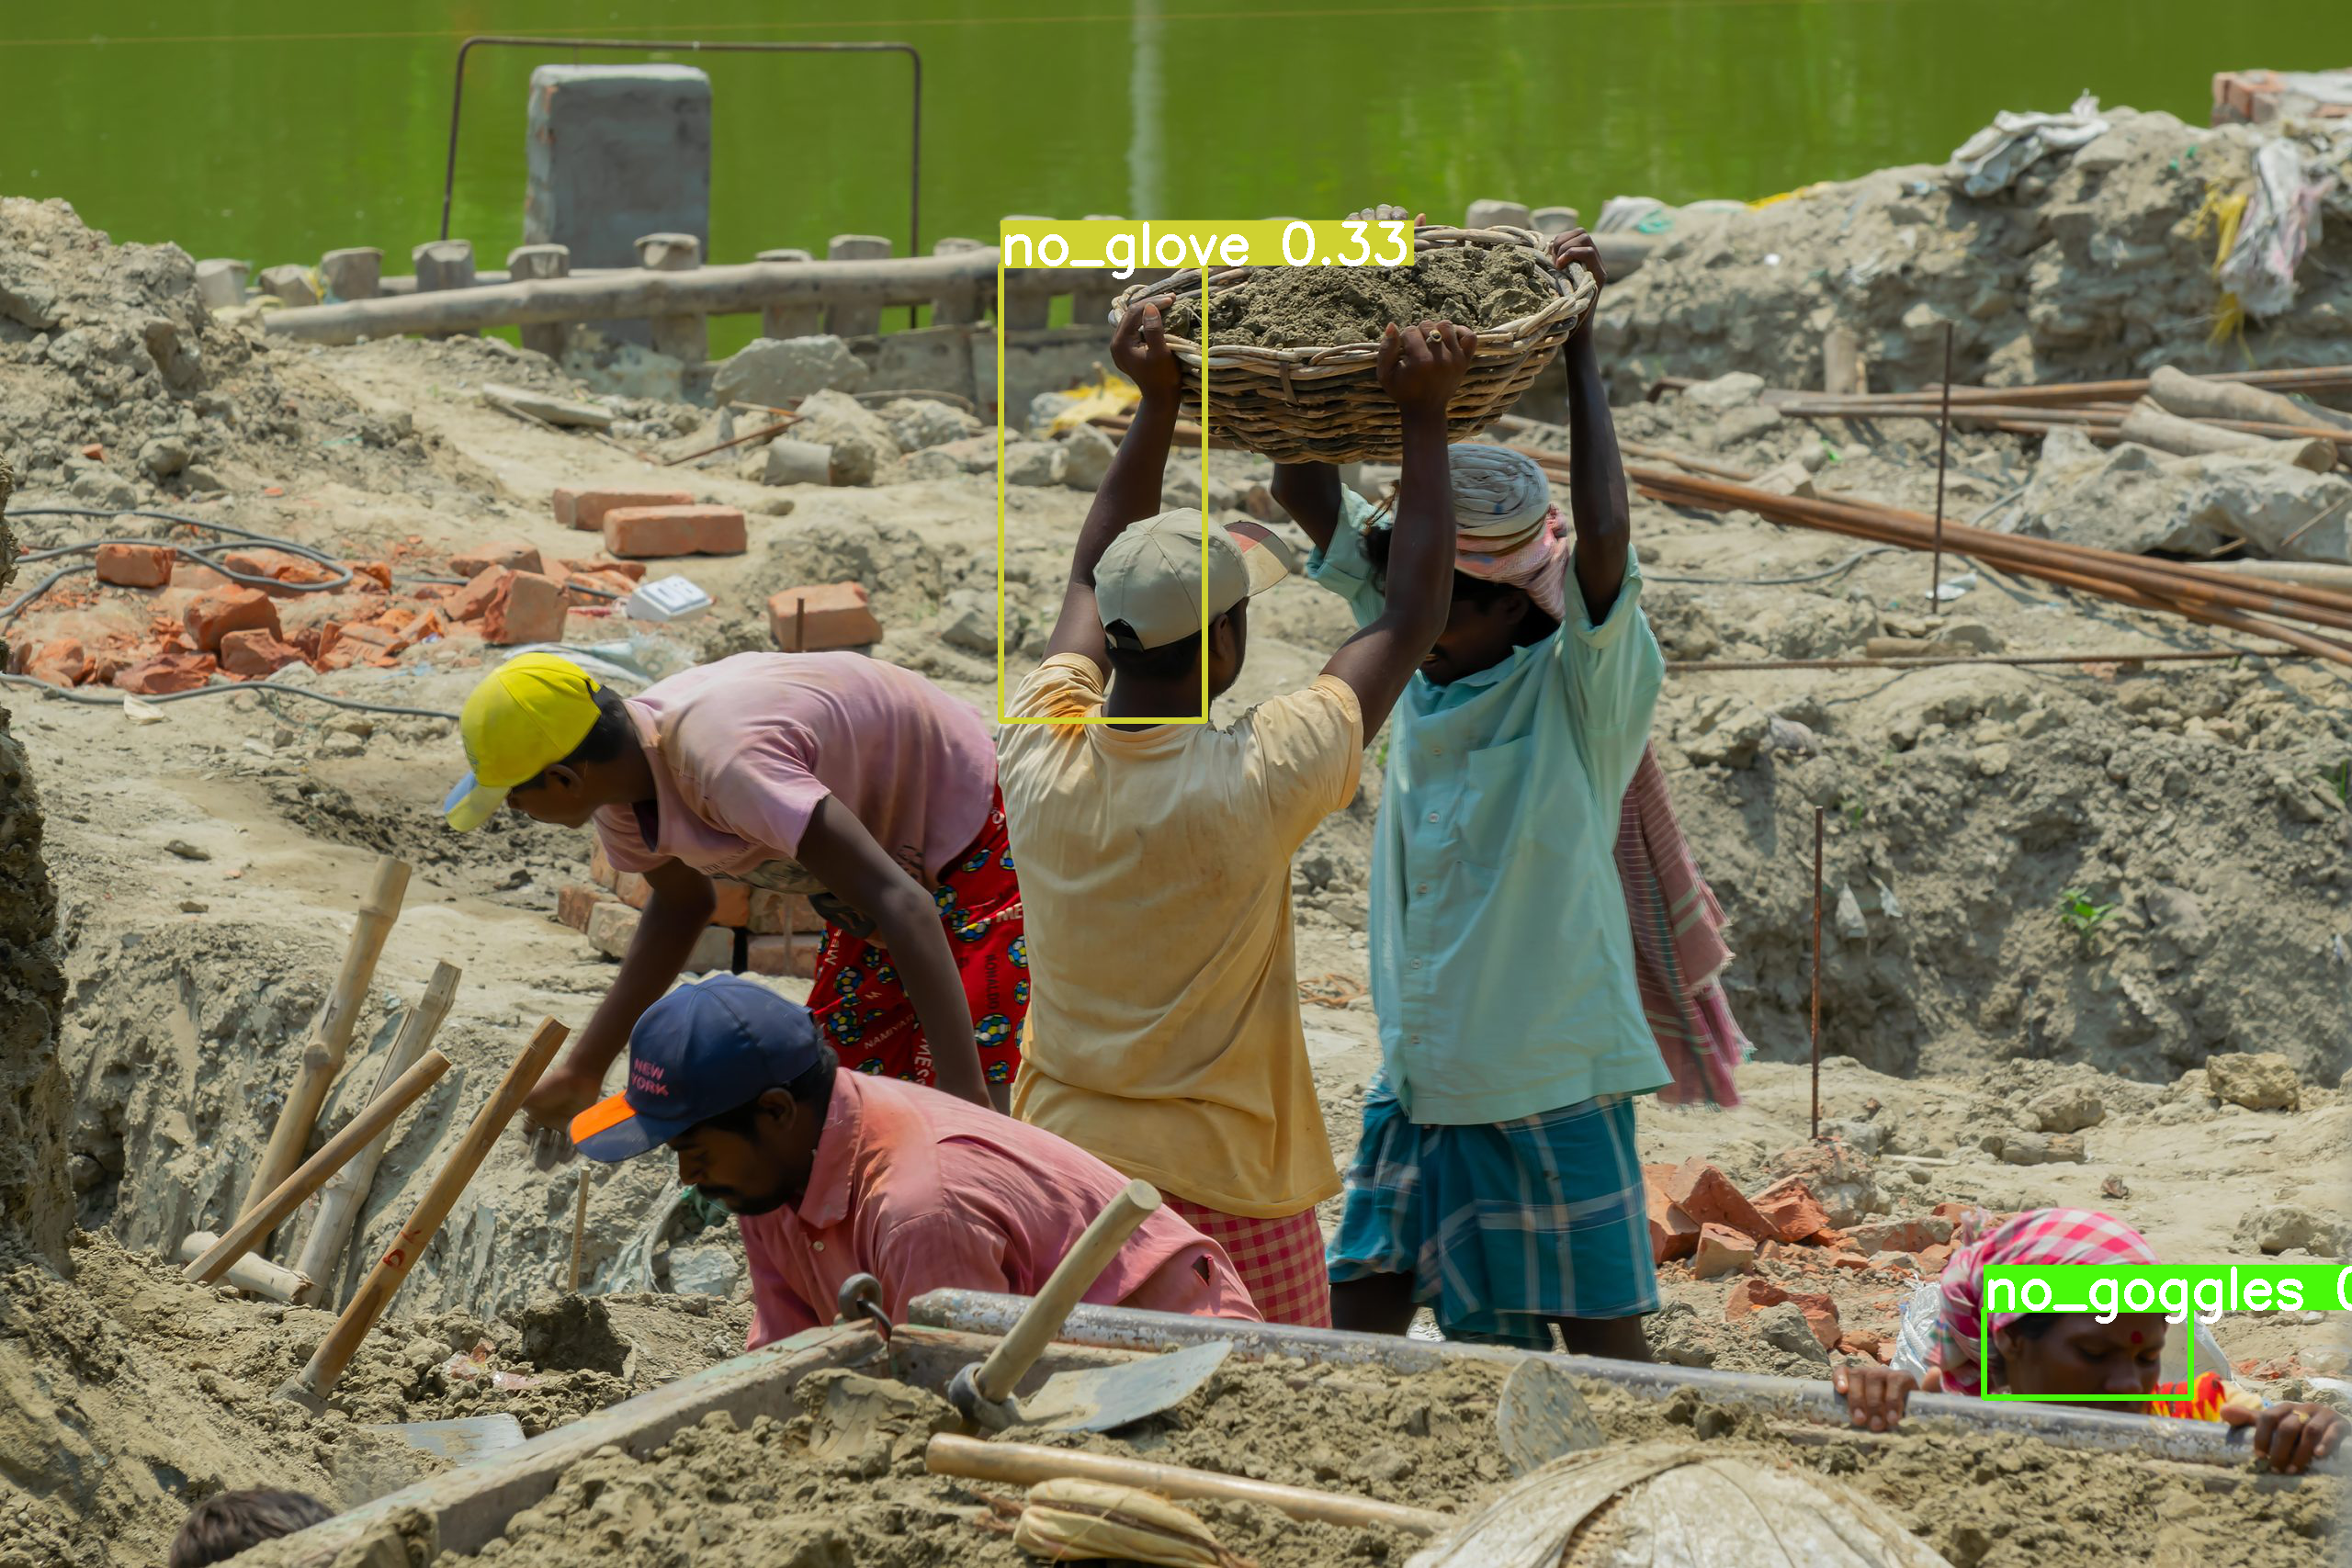

In [31]:
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()

In [32]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
const listenerChannel = new BroadcastChannel('channel');
listenerChannel.onmessage = (msg) => {
  const div = document.createElement('div');
  div.textContent = msg.data;
  document.body.appendChild(div);
};

In [ ]:
%%javascript
const senderChannel = new BroadcastChannel('channel');
senderChannel.postMessage('Hello world!');